# Physicsl Model of Living Systems
## Homework 3
### Maryam Feizi - 2091504

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## 1) Random Matrix
Generate random matrix with size $S\times S$ with non zero entries having a probability of C, set diagonal to -d.
The values are:
- S : number of species
- C : percentage of non zero entries
- d : diagonal value


In [2]:
def random_matrix(S, C, d, dist, param):
    # dist : numpy random distribution of the non zero entries
    # param: parameters of the numpy distribution 

    matrix = dist(size=(S, S), **param)

    # set the diagonal to -d
    np.fill_diagonal(matrix, -d)
    
    # set the non-diagonal non zero entries to zero with a probability of 1-C
    matrix[np.triu(np.random.uniform(size = (S, S)), k = 1) > C] = 0
    matrix[np.triu(np.random.uniform(size = (S, S)), k = -1) > C] = 0


    return matrix



The theoretical mean of the real part of the eigenvalue is: -2
The theoretical mean of the imaginary part of the eigenvalue is: 0
The theoretical radius of the circle is 8.48528137423857



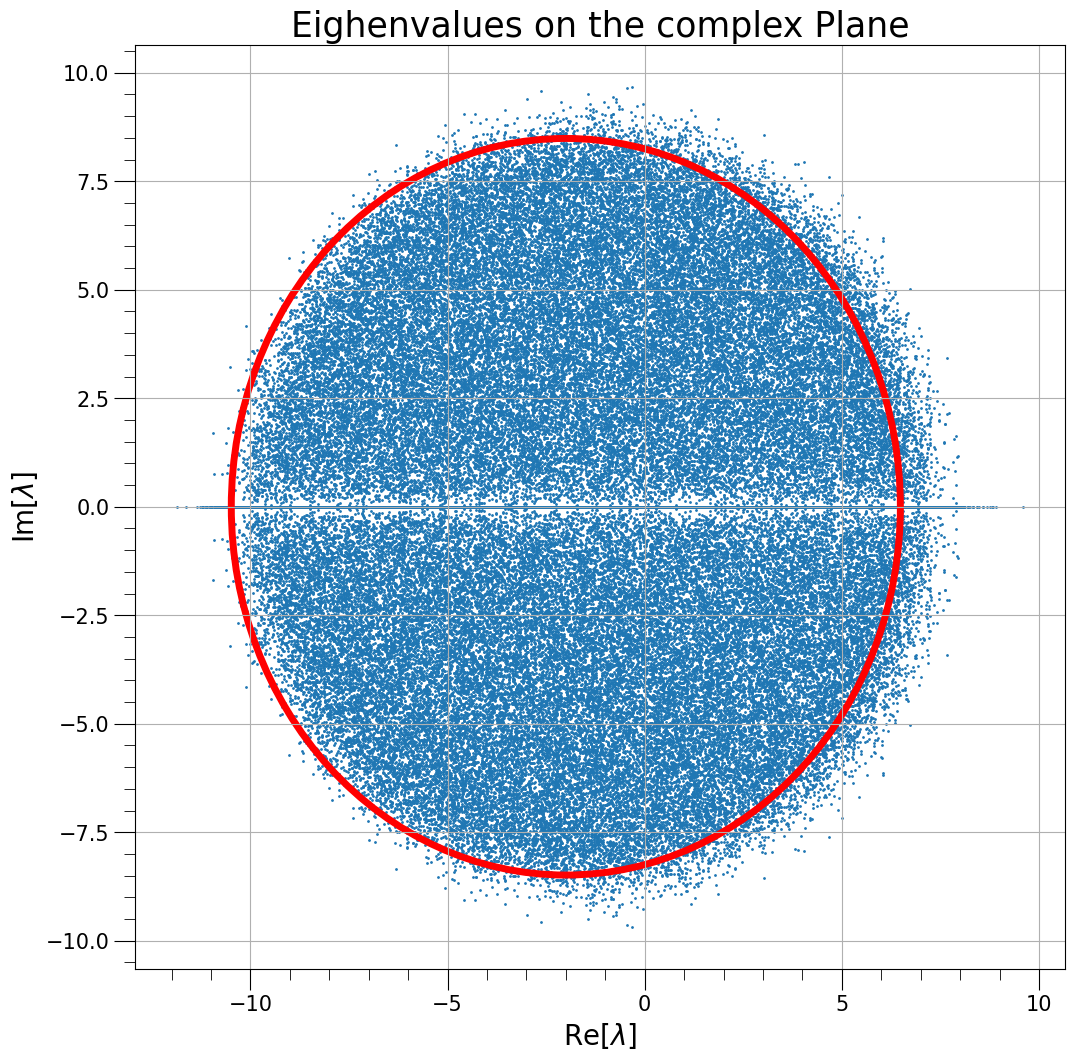

In [3]:
realization_num = 1000
S = 100
C = 0.72
d = 2
dist = np.random.normal
std = 1
param = {'loc':0 , 'scale':std}
print(f'''
The theoretical mean of the real part of the eigenvalue is: {-d}
The theoretical mean of the imaginary part of the eigenvalue is: {0}
The theoretical radius of the circle is {std * np.sqrt(S *C)}
''')

circle = plt.Circle((-d,0), np.sqrt(S*C*std**2), color = 'red', fill=False, linewidth = 5)
fig , ax = plt.subplots(1,1,figsize =(12,12))

for i in range(realization_num):

    r_mat = random_matrix(S , C , d , dist , param)    #random SxS matrix 

    eighenvalues, _ = np.linalg.eig(r_mat)
    ax.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=1, color='C0')
    

ax.add_patch(circle)
ax.set_title('Eighenvalues on the complex Plane', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax.set_ylabel('Im[$\\lambda$]', fontsize = 20)         


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## 2) Mutualistic Structure
In the next part, we study correlation between each species, we will use Gaussian with mean 0 as our distribution. The matrix is built as follows: <br/>
What is found analytically is that in the complex plane we now have an ellipse with semi-axis dependent on the values of the correlation coefficient $\rho$. In particular the two semiaxis are, <br>

<br/>

$$

\begin{cases}

a \approx \sqrt{S \cdot V} \cdot (1 + \rho) \\
\\
b \approx \sqrt{S \cdot V} \cdot (1 - \rho) \\

\end{cases}
$$

Where $V$ is the variance of the distribution of the interaction strengths $\quad V = Var(\alpha_{ij}) \quad$ and $\rho$ is the correlation defined as: 
$$ \quad \rho =\dfrac{ \mathbb{E} \big[ \alpha_{i,j} \alpha_{j,i} \big] - \mathbb{E} ^2 \big[ \alpha_{i,j} \big] }{Var(\alpha_{i,j})}$$

<br/>

Before computing the variables of interest we begin by describing the procedure used to generate the random matrix $\alpha_{i,j}$. <br>
At each step we draw from a random distribution two independent numbers $x_1$ and $x_2$, to build the matrix with the correct structure we then apply a tranformation $x_1$ and $x_2$, for a predator-prey interaction we have $x_1 \rightarrow |x_1|$, $x_2 \rightarrow -|x_2|$, for a mutualistic interaction instead we have $x_1 \rightarrow |x_1|$, $x_2 \rightarrow |x_2|$. <br>
Both the values of $\alpha_{ij} \text{ and } \alpha_{ji}$ will then be set to $0$ with probability $1 - C$.
<br/>

In order to compute $\mathbb{E}[\alpha_{ij}]$ we notice that by construction, it is nothing different from $\mathbb{E}[|x|]$ or better, in our case, $C \cdot \mathbb{E}[|x|]$ which is,

$$

\mathbb{E}[|x|] = \int_{-\infty}^{\infty} |x| \cdot P(x) \cdot dx = \int_{-\infty}^{\infty} |x| \dfrac{1}{\sigma\sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}} \cdot dx \quad =

$$

$$

\quad = \dfrac{2}{\sigma\sqrt{2 \pi}} \cdot \int_{0}^{\infty} xe^{-\frac{x^2}{2 \sigma^2}} \cdot \mathcal{d}x \quad \text{making the change of variable} \quad u = \frac{x^2}{2 \sigma^2} \quad \text{we get} \quad

$$

$$

\dfrac{2}{\sigma\sqrt{2 \pi}} \cdot \int_{0}^{\infty} e^{- \frac{u}{\sigma^2}} \mathcal{d}u = \dfrac{2 \sigma}{\sqrt{2 \pi}} 

$$

For $\mathbb{E}[\alpha_{ij}]$ we have $\mathbb{E}[\alpha_{ij}] = \int_{-\infty}^{\infty}|x|C \cdot P(x) \mathcal{d}x + \int_{-\infty}^{\infty}|x|(1 -C) \cdot \overbrace{\tilde{P}}^{ \equiv \text{ } 0}$ that, as previously stated, is nothing different for $C \cdot \mathbb{E}[|x|]$

and with a similar reasoning we have $\mathbb{E} \big[ \alpha_{i,j} \alpha_{j,i} \big] = C \cdot \mathbb{E}^2 \big[ |x| \big]$. Let us also state that this directly follows from the way we build our matrix, in particular from the fact that we set to $0$ both $\alpha_{ij}$ and $\alpha_{ji}$ with probability $1 - C$. If on the contrary we would set them to $0$ independently with the same probability we would obtain $Var{(\alpha_{ij})} = C^2 \mathbb{E}^2[|x|]$ and $\rho$ would have been $0$ obtaining once again something circular (with the outlier eigenvalue given by the non $0$ mean).

<br/>

We start by computing the variance, $Var(\alpha_{ij}) = \mathbb{E[{a_{ij}a_{ij}}]} - \mathbb{E^2[a_{ij}]}$ which is given by,

<br/>


$$

Var(\alpha_{ij}) = \mathbb{E[x^2]} - \mathbb{E^2[\big|x\big|]} = C \cdot \sigma^2 - C^2 \cdot \dfrac{2 \sigma^2}{\pi} = C \sigma^2 \cdot (1 - C \cdot \dfrac{2}{\pi})

$$

<br/>

From all this follows that $ \quad \rho =\dfrac{ \mathbb{E} \big[ \alpha_{i,j} \alpha_{j,i} \big] - \mathbb{E} ^2 
\big[ \alpha_{i,j} \big] }{Var(\alpha_{i,j})} = \dfrac{C \mathbb{E}^2(x) - C^2 \mathbb{E^2(x)}}{Var(a_{ij})} = \dfrac{\cancel{C} \mathbb{E}^2(x) \cdot (1 - C)}{ \cancel{C} \sigma^2 \cdot (1 - C \dfrac{2}{\pi})},$

<br/>

$$

\rho = \dfrac{\cancel{4}^2 \cancel{\sigma^2} \cdot (1 - C)}{\cancel{2} \pi \cancel{\sigma^2} \cdot (1 - C\dfrac{2}{\pi})},

$$


$$

\rho = \dfrac{2 (1 - C)}{\pi \cdot (1 - C \dfrac{2}{\pi})} = \dfrac{1 - C}{\dfrac{\pi}{2} - C}

$$

<br/>


### Verifying the analytical results

In [4]:
n_species = 100
std = 1
d = 2
C = 0.72

random_matrix = np.random.normal(size = (n_species, n_species), loc = 0, scale = std)
random_matrix = np.abs(random_matrix)
np.fill_diagonal(random_matrix, -d)


In [5]:
def mutualistic_random_matrix(S, C, d, dist, param):


    # dist: numpy random distribution of the non zero entries
    # param: parameters of the numpy distribution (has to be a dictionary)

    # Generate a random matrix
    matrix = dist(size=(S, S), **param)

    matrix = np.abs(matrix)

    
    # Set the diagonal to -d
    

    mutualistic_mask = np.triu(np.random.uniform(size = (S, S)), k = 1)

    mask_func = np.vectorize(lambda x: 0 if x > C else 1)

    mutualistic_mask = mask_func(mutualistic_mask)

    mutualistic_mask[np.tril_indices(S, k= -1)] = 0

    final_mask = mutualistic_mask.T + mutualistic_mask 

    # Set the off-diagonal non zero entries to zero with a probability of 1-C
    matrix = matrix * final_mask

    
    np.fill_diagonal(matrix, -d)

    # Calculate the eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)
    
    

    return eigenvalues

In [6]:
distributions = {'gaussian': np.random.normal, 'uniform': np.random.uniform}

extrema = std * np.sqrt(3)
parameters = {'gaussian': {'loc': 0, 'scale': std}, 'uniform': {'low': -extrema, 'high': extrema}}

eigenvalues = np.concatenate([mutualistic_random_matrix(S, C, d,
                         distributions['gaussian'], parameters['gaussian']) for _ in range(realization_num)])

In [7]:
eigenvalues

array([55.11995663+0.j        ,  5.5388332 +0.j        ,
        5.1884748 +1.51392378j, ..., -3.80448542+0.j        ,
       -2.62082095+0.j        , -1.76251596+0.j        ])

In [11]:
real = C * (S - 1) * ((2 * std) / (np.sqrt(2 * np.pi))) - d
print(f'''
We expect the system to be unstable as the theroetical real part of the "outlier" eigenvalue is {real:.3f} 
''')


We expect the system to be unstable as the theroetical real part of the "outlier" eigenvalue is 54.873 



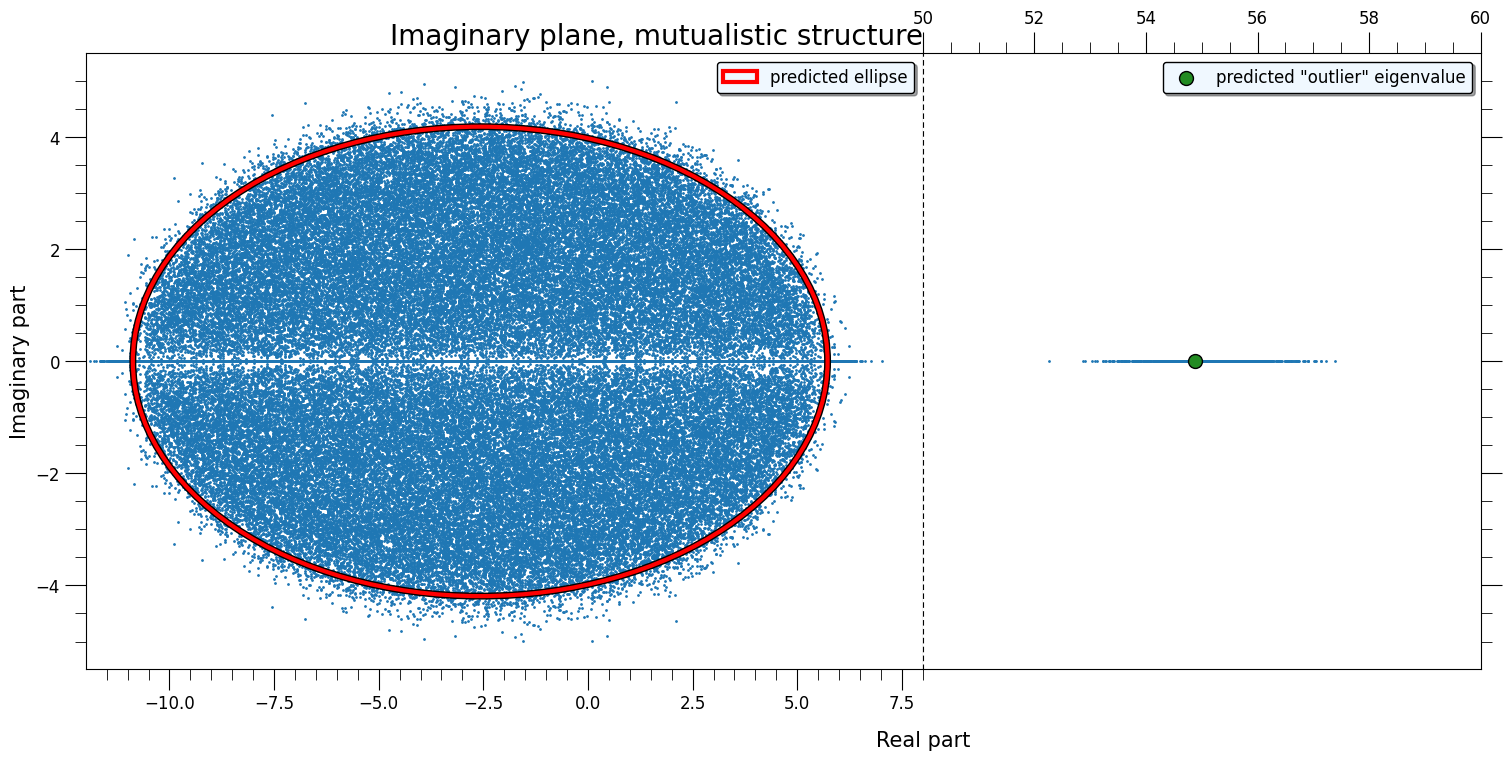

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8), sharey=True, gridspec_kw={'wspace': 0, 'width_ratios': [3, 2]})
ax1.scatter(eigenvalues.real, eigenvalues.imag, s = 1, color = 'C0')
ax1.set_xlim(-12, 8)
ax2.scatter(eigenvalues.real, eigenvalues.imag, s = 1, color = 'C0')
ax2.set_xlim(50, 60)
ax2.spines['left'].set_linestyle((0, (4, 4)))
#ax1.add_patch(plt.Circle((-d - C * (2 * std/ np.sqrt(np.pi * 2)), 0), np.sqrt(C * std**2 * (1 - C * (2 / np.pi)) * S), color='red', fill=False, linewidth = 3, zorder = 2, label = 'predicted circle'))
#ax1.add_patch(plt.Circle((-d - C * (2 * std/ np.sqrt(np.pi * 2)), 0), np.sqrt(C * std**2 * (1 - C * (2 / np.pi)) * S), color='black', fill=False, linewidth = 5, zorder = 1))
ax2.scatter(C * (S - 1) * ((2 * std) / (np.sqrt(2 * np.pi))) - d, 0, edgecolor = 'black', color = 'forestgreen', s = 100, zorder = 3, label = 'predicted "outlier" eigenvalue')
ax2.xaxis.tick_top()


ax2.yaxis.tick_right()

for ax in [ax1, ax2]:
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', labelsize=12, length=15)
    ax.tick_params(axis='both', which='minor', labelsize=12, length=8)

ax1.set_xlabel('Real part', fontsize = 15)
ax1.set_ylabel('Imaginary part', fontsize = 15)
ax1.xaxis.set_label_coords(1, -.1)

ax1.set_title('Imaginary plane, mutualistic structure', fontsize = 20, loc = 'right')


rho = (1-C)/((np.pi/2) - C)


ax1.add_patch(matplotlib.patches.Ellipse(xy = (-d - C * (2 * std)/ np.sqrt(2 * np.pi), 0) ,
                                     width =2 *  np.sqrt(S*C*(std**2)*(1 - 2*C/np.pi))*(1 + rho),
                                     height = 2 * np.sqrt(S*C*(std**2)*(1 - 2*C/np.pi))*(1 - rho),\
                                        color='red', fill=False, linewidth = 3, zorder = 2, label = 'predicted ellipse'))                                        

ax1.add_patch(matplotlib.patches.Ellipse(xy = (-d - C * (2 * std)/ np.sqrt(2 * np.pi), 0) ,
                                     width =2 *  np.sqrt(S*C*(std**2)*(1 - 2*C/np.pi))*(1 + rho),
                                     height = 2 * np.sqrt(S*C*(std**2)*(1 - 2*C/np.pi))*(1 - rho),\
                                        color='black', fill=False, linewidth = 5, zorder = 1))   

ax1.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
ax2.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)                                        

plt.show()


In [13]:
print(f'The value of rho is {rho:}')

The value of rho is 0.329103442482892


We can see that the mutualistic iteration makes the system more unstable, that is because $\rho > 0$ and it is around 0.26 , so the semi-axis $a$ is bigger than $b$.

## Scaling of the Maximum Eigenvalue
In this part we study how the maximum real part between all the eigenvalues scales at various values of the number of species $S$ we choose as values $S = [20,50, 100,200]$. <br>
We expect to find, in our setting, something linear as the the maximum eigenvalue is given by the condititon,

$$

max \big\{   \sqrt{(SV)} \cdot (1 \pm \rho) - C \mu -d, \quad  (S - 1) \cdot C \mu -d  \big\},

$$

In our case our condition can be formulated as,

$$

max \big\{   \sqrt{(SV)} \cdot (1 + \rho), \quad S \cdot C \mu   \big\}; \quad max \big\{\sqrt{(SC \sigma^2) \cdot( 1 - C \dfrac{2}{\pi})}\cdot (1 + \rho), \quad  S \cdot C \mu  \big\}; \quad max \big\{\sqrt{(SC \sigma^2) \cdot( 1 - C \dfrac{2}{\pi})}\cdot (1 + \rho), \quad  S \cdot C \dfrac{2 \sigma}{\sqrt{2 \pi}}  \big\},

$$

And looking at the extrema of our interval $(S = 20\text{ and }S = 200)$ we get respectively $\approx max\{  3.71, \quad 11.49  \}$ and $\approx \max\{   11.74, \quad 114.89   \}$ and so the linear part prevales, let's check it below.


The maximum condition for S = 200 is,
11.737967251316098, 114.89537675561262

The maximum condition for S = 20 is,
3.711871161462494, 11.48953767556126



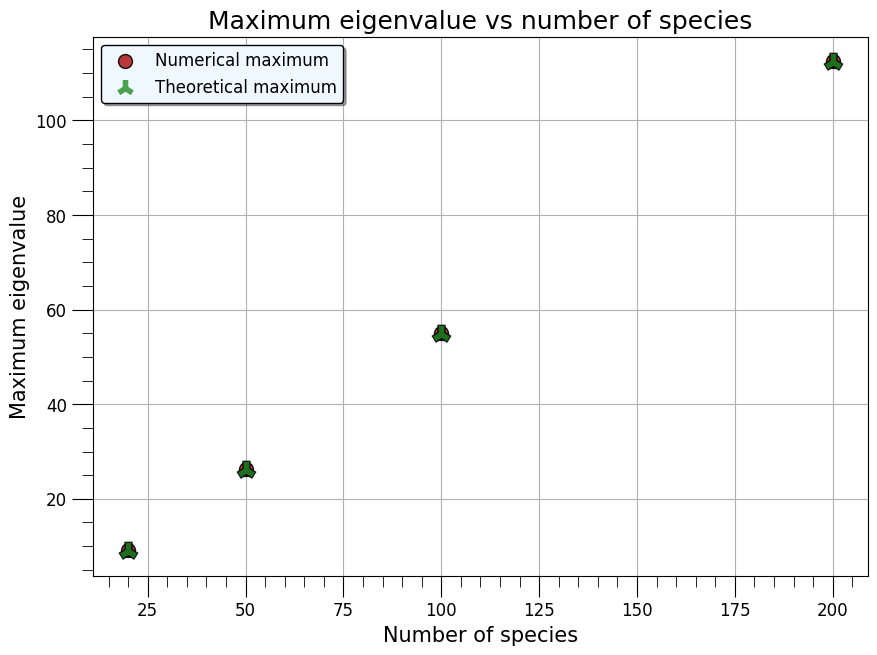

In [14]:
print(f'''
The maximum condition for S = 200 is,
{np.sqrt((S := 200 * C * std**2) * (1 - C * (2 / np.pi)) ) * (1 + rho)}, {(S := 200) * C * (2 * std) / (np.sqrt(2 * np.pi))}

The maximum condition for S = 20 is,
{np.sqrt((S := 20 * C * std**2) * (1 - C * (2 / np.pi)) ) * (1 + rho)}, {(S := 20) * C * (2 * std) / (np.sqrt(2 * np.pi))}
''')

V = C * std**2 * (1 - (2*C)/ np.pi)

mu = (2*std)/(np.sqrt(2*np.pi))


C = 0.72



range_species = np.array([20,50,100, 200])

max_eigenvalues = [np.mean([np.max(mutualistic_random_matrix(species, C, d, distributions['gaussian'], parameters['gaussian']).real)\
      for _ in range(1000)]) for species in range_species]

predicted_eig = [np.max( np.array([ (np.sqrt(species*V)*(1 + rho)- C*mu -d) , ((species-1)*C*mu -d) ] )) for species in range_species]

fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(range_species, max_eigenvalues, s= 100, color = 'firebrick', edgecolor = 'black', zorder = 2, alpha = 0.9, label = 'Numerical maximum')
ax.scatter(range_species, predicted_eig, s= 150, color = 'forestgreen', marker = '2', alpha = 0.8, linewidths=4, zorder = 4, label = 'Theoretical maximum')
ax.scatter(range_species, predicted_eig, s= 200, color = 'black', marker = '2', alpha = 0.9, linewidths=6, zorder = 3)
ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)
ax.set_ylabel('Maximum eigenvalue', fontsize = 15)
ax.set_xlabel('Number of species', fontsize = 15)
ax.set_title('Maximum eigenvalue vs number of species', fontsize = 18)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
ax.minorticks_on()
ax.grid(zorder = 1)
plt.show()


## 3) Analyzing the food web

In this section of the notebook we import the food web data and we analyze it computing some of the metrics of interest that include:

- Generality of a species: how many species it predates, defined as    $  G_i = \sum\limits_{j = 1}^{S} \dfrac{a_{ji}}{LS}  $ where L is the number of links in the network

- Vulnerability of a species: how many species it is preyed by, defined as $  V_i = \sum\limits_{j = 1}^{S} \dfrac{a_{ij}}{LS}  $

- Overlap (Connected to trophic similarity): the number of predators and preys shared by two species, defined as $ S_{ij} = \dfrac{\sum_{k} a_{ki}a_{kj}  + \sum_{k}a_{ik}a_{jk}}{S}$

- Trophic level, $S_i = 1 + \dfrac{1}{ k_i^{in} } \sum\limits_{j = 1}^{S}a_{ji}S_j$ where $K_i^{in}$ is the number of incoming links of node i. If a graph with adjacency matrix A has at least a basal node, and every species belongs to at least one food chain, then $S_i$ defines the trophic level of node i.

- Trophic difference: defined as $X_{ij} = S_i - S_j$

- Trophic coherence: how neatly nodes fall into distinct levels of the network, defines as
 $$q = \sqrt{\dfrac{1}{L} \cdot \langle X^2 \rangle - \langle X \rangle^2} \quad = \quad \sqrt{ \dfrac{1}{L} \cdot \sum\limits_{ij}a_{ij}X_{ij}^2 - \big( \sum\limits_{ij}a_{ij}X_{ij} \big)^2}  $$

We choose the property of $p(X)$ so that $\langle X \rangle = \sum_{ij} a_{ij} X_{ij} = 1$, in this case for the trophic coherence we are left to compute $\quad q = \sqrt{\dfrac{1}{L}\langle X^2 \rangle - 1}$


In [46]:
# reading the file
food_web = pd.read_excel('Food-web-Dataset-PNAS-05.xls', index_col=0)
food_web

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0.000000,0.000226,0.000006,0.000001,0.000001,0.000002,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,2.266301e-07,3.244932e-07,0.000000
A1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,4.724895e-06,1.682557e-06,0.000000
A2,0,0,0,0,0.000000,0.000000,0.000000,0.000022,0.000022,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,1.016026e-06,0.000000e+00,0.000000
A3,0,0,0,0,0.026745,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
I1,0,0,0,0,0.000000,0.000000,0.000000,0.000685,0.000685,0.003196,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000413,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
F205,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001256,0.0,0.000000,0.000278,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000587
F206,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001797,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000


In [47]:
# want to convert values to binary 
food_web = food_web.applymap(lambda x:1 if x>0 else 0 , na_action='ignore')
food_web

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
A2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
A3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
F205,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
F206,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
# finding total number of species
S = food_web.shape[0]
print('The food web species is:', S)

The food web species is: 249


In [49]:
# computing the generality of the food web
sum_axis = {'rows':0 , 'columns':1}
food_web_matrix = np.array(food_web)
l = np.sum(food_web_matrix)     #find number of linkes
general_array = np.sum(food_web_matrix, axis=sum_axis['rows'])/(l*S)
pd.DataFrame(general_array, columns=['Generality'], index=food_web.index)

,Generality
prey\predator,
D1,0.000000
A1,0.000000
A2,0.000000
A3,0.000000
I1,0.000002
...,...
F204,0.000032
F205,0.000000
F206,0.000021


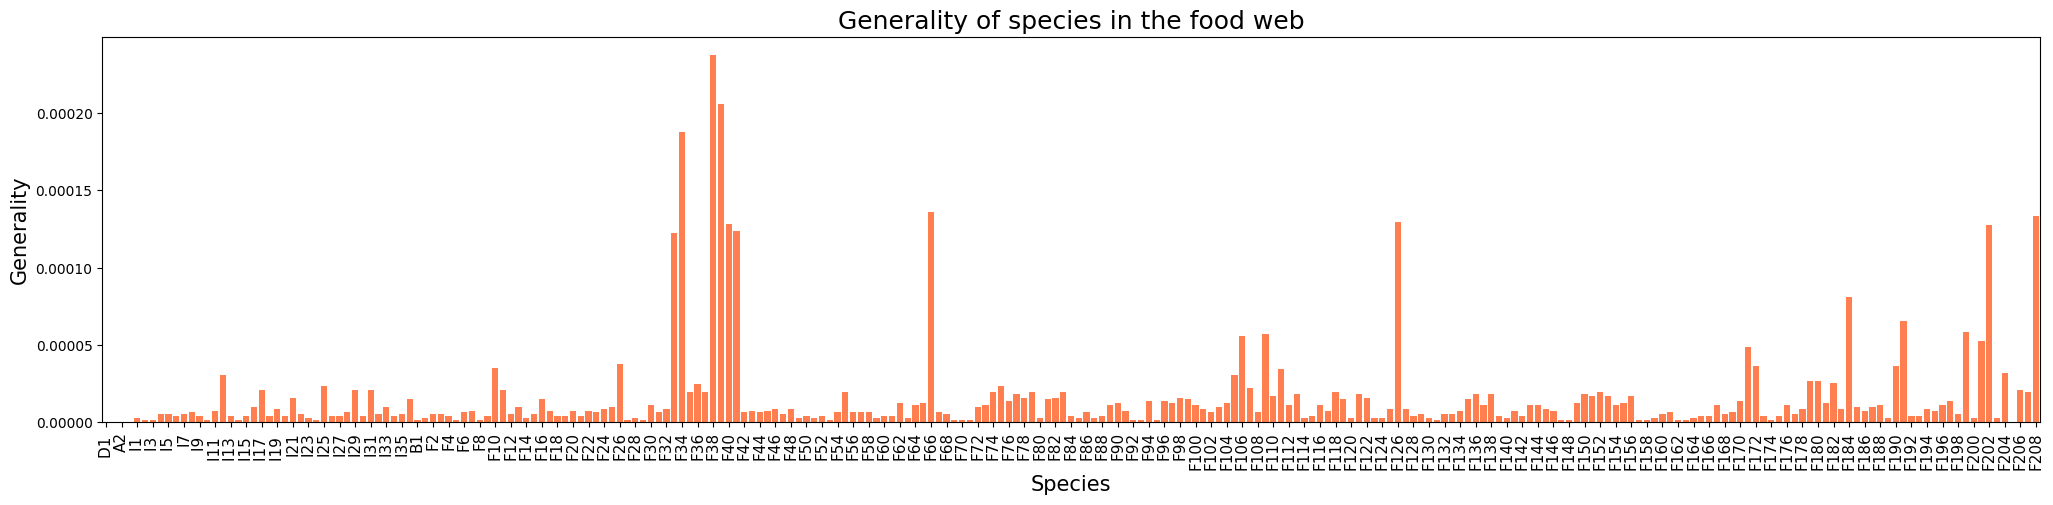

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))

# In the label we put 1 every 2 species for a better visualization

ax.bar(np.arange(len(food_web)), general_array, color = 'coral')
ax.set_xticks(np.arange(len(food_web))[::2])
ax.set_xticklabels(food_web.index[::2], rotation = 90, fontsize = 11)
ax.set_xlim(-0.5, len(food_web.index) - 0.5)
ax.set_xlabel('Species', fontsize = 15)
ax.set_ylabel('Generality', fontsize = 15)
ax.set_title('Generality of species in the food web', fontsize = 18)
plt.show()

In [51]:
# computing the vulnerbility of the food web
vulner_array = np.sum(food_web_matrix, axis=sum_axis['columns'])/(l*S)
pd.DataFrame(vulner_array, columns=['Vulnerbility'], index=food_web.index)

,Vulnerbility
prey\predator,
D1,0.000059
A1,0.000085
A2,0.000036
A3,0.000015
I1,0.000028
...,...
F204,0.000008
F205,0.000016
F206,0.000005


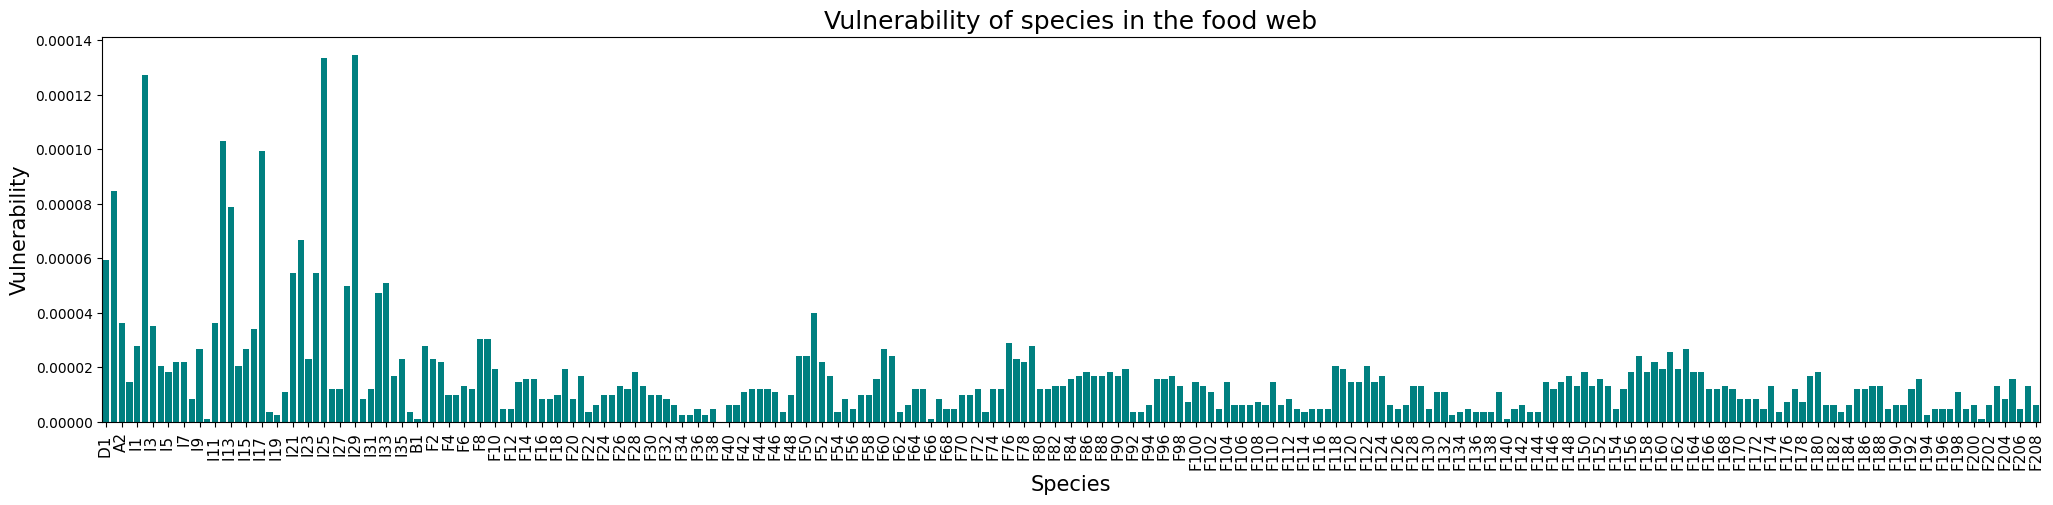

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))

# In the label we put 1 every 2 species for a better visualization

ax.bar(np.arange(len(food_web)), vulner_array, color = 'teal')
ax.set_xticks(np.arange(len(food_web))[::2])
ax.set_xticklabels(food_web.index[::2], rotation = 90, fontsize = 11)
ax.set_xlim(-0.5, len(food_web.index) - 0.5)
ax.set_xlabel('Species', fontsize = 15)
ax.set_ylabel('Vulnerability', fontsize = 15)
ax.set_title('Vulnerability of species in the food web', fontsize = 18)
plt.show()

In [53]:
# computing the overlap of the foodweb

trophic_simil = (food_web_matrix.T.dot(food_web_matrix) + food_web_matrix.dot(food_web_matrix.T))/S
pd.DataFrame(trophic_simil, columns = food_web.columns, index = food_web.index)

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0.196787,0.116466,0.052209,0.040161,0.052209,0.132530,0.032129,0.036145,0.016064,0.024096,...,0.004016,0.004016,0.004016,0.008032,0.008032,0.004016,0.008032,0.000000,0.004016,0.008032
A1,0.116466,0.281124,0.096386,0.008032,0.032129,0.136546,0.108434,0.064257,0.052209,0.060241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000
A2,0.052209,0.096386,0.120482,0.000000,0.024096,0.068273,0.060241,0.052209,0.044177,0.040161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,0.040161,0.008032,0.000000,0.048193,0.028112,0.048193,0.008032,0.004016,0.004016,0.004016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I1,0.052209,0.032129,0.024096,0.028112,0.100402,0.068273,0.016064,0.016064,0.012048,0.012048,...,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.004016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0.004016,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.096386,0.024096,0.064257,0.060241,0.024096,0.132530,0.024096,0.012048,0.008032,0.060241
F205,0.008032,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.012048,0.016064,0.004016,0.012048,0.044177,0.024096,0.052209,0.016064,0.032129,0.012048
F206,0.000000,0.000000,0.000000,0.000000,0.004016,0.008032,0.004016,0.012048,0.012048,0.008032,...,0.008032,0.008032,0.004016,0.016064,0.008032,0.012048,0.016064,0.084337,0.060241,0.016064


In [66]:
# computing the number of incoming links for each species
# the incoming links correspond to the species it predates
incom_link = np.sum(food_web_matrix, axis=sum_axis['rows'])
incom_link_df =pd.DataFrame(incom_link, columns=['Incoming Links'], index=food_web.index)
incom_link_df.index = incom_link_df.apply(lambda x: x.name.strip(), axis =1)

In [67]:
basal_species = incom_link_df[incom_link == 0]
basal_species.index.name = 'Basal Species'
# in the definition of S_i, it is equal to 0
basal_species.loc[:, 'S_i'] = np.ones(basal_species.shape[0]).astype(int)
basal_species

/tmp/ipykernel_5721/479105889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basal_species.loc[:, 'S_i'] = np.ones(basal_species.shape[0]).astype(int)


,Incoming Links,S_i
Basal Species,,
D1,0,1
A1,0,1
A2,0,1
A3,0,1
F205,0,1


In [68]:
print(f'We have that the basal species of the food web, the ones that do not prey on any other species, are:' 
      , '\n', list(basal_species.index))

We have that the basal species of the food web, the ones that do not prey on any other species, are: 
 ['D1', 'A1', 'A2', 'A3', 'F205']


In [69]:
food_web.index = food_web.index.str.strip() # removing the spaces in the index
food_web.columns = food_web.columns.str.strip() #removing the space in the columns

In [74]:
# define a trophic level of each species in a recursive way
def trophic_level(df_food , df, s):
    
    if df.loc[s, 'Incoming Links'] == 0:
        df.loc[s,'S_i_final'] = 1
        return
    
    df.loc[s,'S_i_final'] = 1
    sp_con = df_food.index[df_food.loc[:,s] == 1].tolist()
    
    for i in sp_con:
        if df.loc[i,'S_i_final'] == 0:
            trophic_level(df_food , df, i)


    

        df.loc[s,'S_i_final'] += df.loc[i,'S_i_final']/(df.loc[s, 'Incoming Links'])
        
    return 


In [64]:
incom_link_df['S_i_final'] = np.zeros(incom_link_df.shape[0])
incom_link_df

,Incoming Links,S_i_final
D1,0,0.0
A1,0,0.0
A2,0,0.0
A3,0,0.0
I1,2,0.0
...,...,...
F204,26,0.0
F205,0,0.0
F206,17,0.0
F207,16,0.0


In [42]:
incom_link_df.loc
# list(incom_link_df)
for s in list(incom_link_df.index):
    m= incom_link_df.loc[s, 'Incoming Links'] == 0
m

False

In [76]:
incom_link_df['S_i_final'] = np.zeros(incom_link_df.shape[0])

for s in list(incom_link_df.index):
    if incom_link_df.loc[s, 'S_i_final'] == 0:
        trophic_level(food_web, incom_link_df, s)

incom_link_df

,Incoming Links,S_i_final
D1,0,1.000000
A1,0,1.000000
A2,0,1.000000
A3,0,1.000000
I1,2,2.500000
...,...,...
F204,26,4.743971
F205,0,1.000000
F206,17,3.557709
F207,16,3.579289


In [82]:
trophic_difference = np.array(incom_link_df.S_i_final)[:,np.newaxis] - np.array(incom_link_df.S_i_final)
trophic_coherence = np.sqrt( (1/l) * np.sum(food_web_matrix * trophic_difference**2) - 1)
print("The trophic coherence of the food web is:", f'''{trophic_coherence:.3f}''')

The trophic coherence of the food web is 0.663


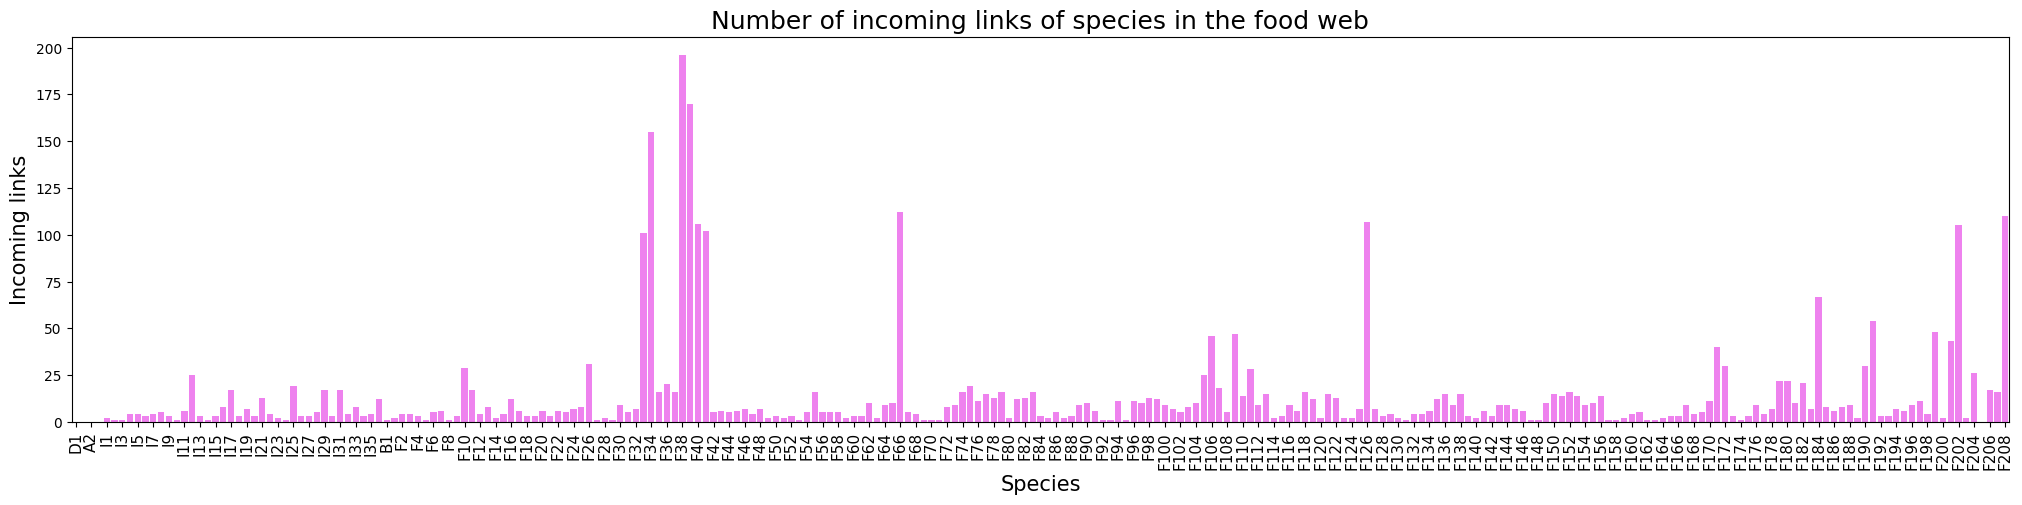

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))

# In the label we put 1 every 2 species for a better visualization

ax.bar(np.arange(len(food_web)), incom_link_df['Incoming Links'], color = 'violet')
ax.set_xticks(np.arange(len(food_web))[::2])
ax.set_xticklabels(food_web.index[::2], rotation = 90, fontsize = 11)
ax.set_xlim(-0.5, len(food_web.index) - 0.5)
ax.set_xlabel('Species', fontsize = 15)
ax.set_ylabel('Incoming links', fontsize = 15)
ax.set_title('Number of incoming links of species in the food web', fontsize = 18)
plt.show()

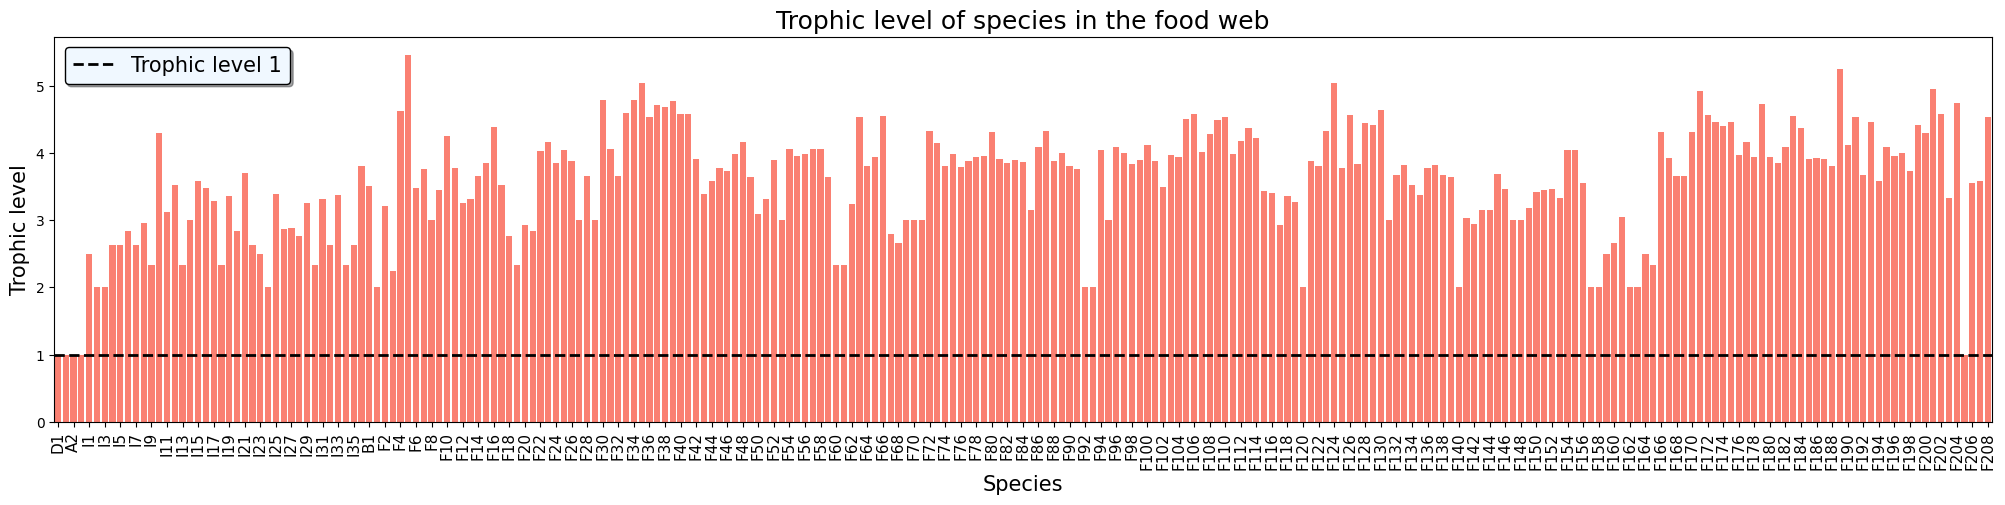

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))

# In the label we put 1 every 2 species for a better visualization

ax.bar(np.arange(len(food_web)), incom_link_df['S_i_final'], color = 'salmon')
ax.set_xticks(np.arange(len(food_web))[::2])
ax.set_xticklabels(food_web.index[::2], rotation = 90, fontsize = 11)
ax.set_xlim(-0.5, len(food_web.index) - 0.5)
ax.set_xlabel('Species', fontsize = 15)
ax.set_ylabel('Trophic level', fontsize = 15)
ax.set_title('Trophic level of species in the food web', fontsize = 18)
ax.axhline(1, color = 'black', linestyle = '--', label = 'Trophic level 1', linewidth = 2)
ax.legend(facecolor = 'aliceblue', shadow=True, edgecolor = 'black', loc = 'upper left', fontsize = 15)
plt.show()

## Visualizing the Trophic levels
In the following, we plot the number of incoming links(normalized by dividing by  it's standard deviation) and the trophic level to see if we notic a behaviour with the trophic level increasing with the number of incoming links

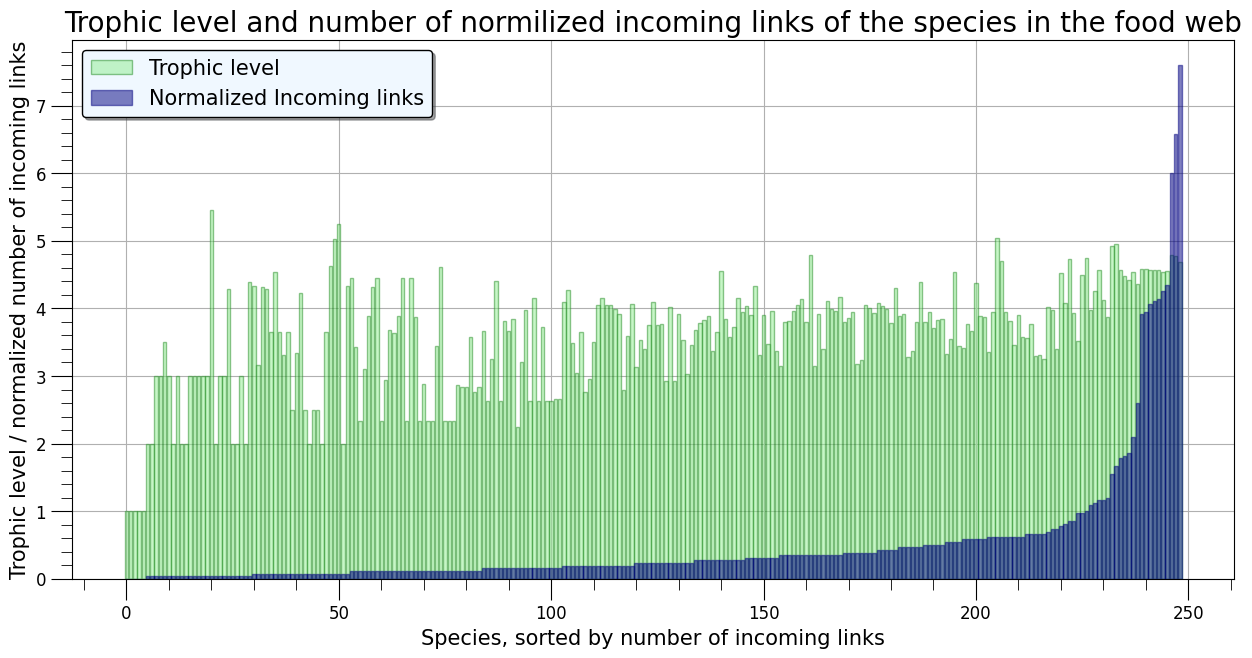

In [93]:
incoming_sorted = incom_link_df.sort_values(by = 'Incoming Links', ascending = True)
fig, ax = plt.subplots(figsize = (15, 7))
width = 0.8
ax.bar(np.arange(len(incoming_sorted)), incoming_sorted['S_i_final'], color = 'lightgreen', width = width, alpha = 0.5, edgecolor = 'forestgreen', zorder = 2,\
     label = 'Trophic level')
ax.bar(np.arange(len(incoming_sorted)), incoming_sorted['Incoming Links'].to_numpy()/np.std(incoming_sorted['Incoming Links'].to_numpy()),\
     color = 'navy', alpha = 0.5, edgecolor = 'navy', zorder = 2, label = 'Normalized Incoming links')

ax.set_xlabel('Species, sorted by number of incoming links', fontsize = 15)
ax.set_ylabel('Trophic level / normalized number of incoming links', fontsize = 15)
ax.grid(zorder = 1)
ax.minorticks_on()
ax.legend(fontsize = 15, facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
ax.set_title('Trophic level and number of normilized incoming links of the species in the food web', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)